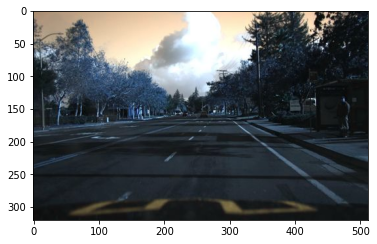

In [25]:
import matplotlib.pyplot as plt
plt.imshow(img2)

# Self Driving

https://github.com/streamlit/demo-self-driving/

## Udacity real driving dataset hosted on my S3

In [14]:
import altair as alt
import pandas as pd
import numpy as np
import os, urllib, cv2

In [15]:
DATA_URL_ROOT = "https://self-driving-dataset.s3-us-west-2.amazonaws.com/Ch2_001/center/"

In [16]:
frame = pd.read_csv('Ch2_001/final_example.csv')
frame.head()

,frame_id,steering_angle
0,1479425441182877835,-0.373665
1,1479425441232704425,-0.065396
2,1479425441282730750,-0.160735
3,1479425441332806714,0.317896
4,1479425441382790272,0.196493


In [17]:
list_frame = pd.read_csv('Ch2_001/photos.csv')
list_frame.head()

,photo
0,1479425441182877835.jpg
1,1479425441232704425.jpg
2,1479425441282730750.jpg
3,1479425441332806714.jpg
4,1479425441432724303.jpg


In [18]:
selected_frame = list_frame.photo[0]

In [19]:
# Load the image from S3.
image_url = os.path.join(DATA_URL_ROOT, selected_frame)
# image = load_image(image_url)
with urllib.request.urlopen(image_url) as response:
    img =response.read()

In [11]:
with open('img.jpg','wb') as f:
    f.write(img)

In [14]:
img = cv2.imread('img.jpg')

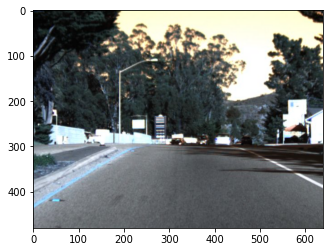

In [15]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [16]:
def load_image(url):
    with urllib.request.urlopen(url) as response:
        image = np.asarray(bytearray(response.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = image[:, :, [2, 1, 0]] # BGR -> RGB
    return image

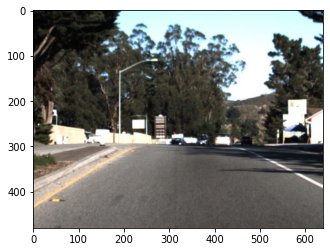

In [17]:
image = load_image(image_url)
import matplotlib.pyplot as plt
plt.imshow(image)

## Streamlit dataset


In [2]:
def load_image(url):
    with urllib.request.urlopen(url) as response:
        image = np.asarray(bytearray(response.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = image[:, :, [2, 1, 0]] # BGR -> RGB
    return image

In [3]:
# Path to the Streamlit public S3 bucket
DATA_URL_ROOT = "https://streamlit-self-driving.s3-us-west-2.amazonaws.com/"

In [8]:
selected_frame = '1478019952686311006.jpg'

In [9]:
# Load the image from S3.
image_url = os.path.join(DATA_URL_ROOT, selected_frame)
image = load_image(image_url)

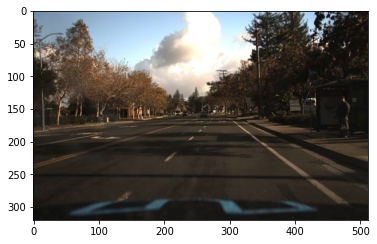

In [26]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [16]:
with urllib.request.urlopen(image_url) as response:
    img =response.read()

In [ ]:
with open('img1.jpg','wb') as f:
    f.write(img)

In [21]:
img2 = cv2.imread('img1.jpg')

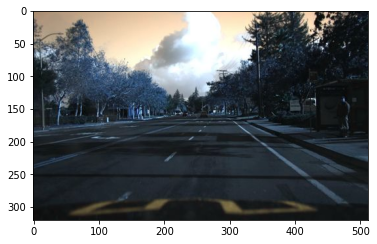

In [27]:
import matplotlib.pyplot as plt
plt.imshow(img2)

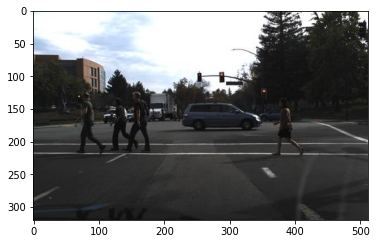

In [28]:
selected_frame = '1478897845285696740.jpg'
image_url = os.path.join(DATA_URL_ROOT, selected_frame)
image = load_image(image_url)
plt.imshow(image)

## Simulated dataset from Unity simulator
https://github.com/llSourcell/How_to_simulate_a_self_driving_car


In [1]:
import pandas as pd
import os

Data loader from [model.py](https://github.com/slevin48/How_to_simulate_a_self_driving_car/blob/master/model.py)

In [ ]:

def load_data(args):
    """
    Load training data and split it into training and validation set
    """
    #reads CSV file into a single dataframe variable
    data_df = pd.read_csv(os.path.join(os.getcwd(), args.data_dir, 'driving_log.csv'), names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])

    #yay dataframes, we can select rows and columns by their names
    #we'll store the camera images as our input data
    X = data_df[['center', 'left', 'right']].values
    #and our steering commands as our output data
    y = data_df['steering'].values

    #now we can split the data into a training (80), testing(20), and validation set
    #thanks scikit learn
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=args.test_size, random_state=0)

    return X_train, X_valid, y_train, y_valid


In [2]:
os.getcwd()

'c:\\Users\\ydebray\\Downloads\\self-driving'

In [3]:
#reads CSV file into a single dataframe variable
data_df = pd.read_csv(os.path.join(os.getcwd(),'term1-simulator-windows','sim_data', 'driving_log.csv'), names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])
data_df.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\ydebray\Downloads\self-driving\term1-...,C:\Users\ydebray\Downloads\self-driving\term1-...,C:\Users\ydebray\Downloads\self-driving\term1-...,0.0,0.0,0,0.000267
1,C:\Users\ydebray\Downloads\self-driving\term1-...,C:\Users\ydebray\Downloads\self-driving\term1-...,C:\Users\ydebray\Downloads\self-driving\term1-...,0.0,0.0,0,0.000034
2,C:\Users\ydebray\Downloads\self-driving\term1-...,C:\Users\ydebray\Downloads\self-driving\term1-...,C:\Users\ydebray\Downloads\self-driving\term1-...,0.0,0.0,0,0.000067
3,C:\Users\ydebray\Downloads\self-driving\term1-...,C:\Users\ydebray\Downloads\self-driving\term1-...,C:\Users\ydebray\Downloads\self-driving\term1-...,0.0,0.0,0,0.000018
4,C:\Users\ydebray\Downloads\self-driving\term1-...,C:\Users\ydebray\Downloads\self-driving\term1-...,C:\Users\ydebray\Downloads\self-driving\term1-...,0.0,0.0,0,0.000104


In [29]:
data_df[['steering','throttle','reverse','speed']]

,steering,throttle,reverse,speed
0,0.0,0.0,0,0.000267
1,0.0,0.0,0,0.000034
2,0.0,0.0,0,0.000067
3,0.0,0.0,0,0.000018
4,0.0,0.0,0,0.000104
...,...,...,...,...
111,0.0,0.0,0,1.282802
112,0.0,0.0,0,0.672539
113,0.0,0.0,0,0.214300
114,0.0,0.0,0,0.187274


In [20]:
path = data_df['center'][0]
path

'C:\\Users\\ydebray\\Downloads\\self-driving\\term1-simulator-windows\\sim_data\\IMG\\center_2021_01_10_11_41_57_831.jpg'

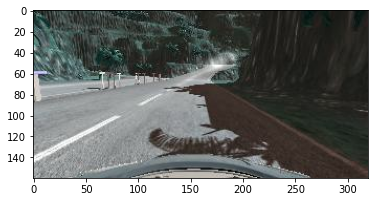

In [10]:
import cv2
img = cv2.imread(path)
import matplotlib.pyplot as plt
plt.imshow(img)

In [22]:
with open(path,'rb') as f:
    img2 = f.read()

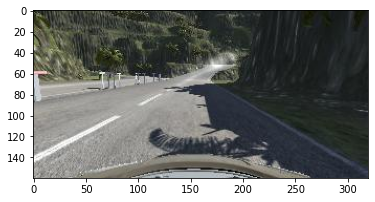

In [24]:
import numpy as np
image = np.asarray(bytearray(img2), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image = image[:, :, [2, 1, 0]] # BGR -> RGB
plt.imshow(image)

In [ ]:
def load_sim_image(path):
    with open(path,'rb') as f:
        image = f.read()
    # image = cv2.imread(path)
    image = np.asarray(bytearray(image), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = image[:, :, [2, 1, 0]] # BGR -> RGB
    return image

## GPS data

In [1]:
import pyarrow.parquet as pq
table = pq.read_table('CH3_002\gpsTT.parquet')
table

pyarrow.Table
timing: timestamp[us]
lat: double
lon: double

In [2]:
table.to_pandas()

,timing,lat,lon
0,2016-12-02 18:11:30.955116,37.399875,-122.108053
1,2016-12-02 18:11:31.955098,37.399875,-122.108053
2,2016-12-02 18:11:32.966157,37.399875,-122.108053
3,2016-12-02 18:11:33.958634,37.399875,-122.108053
4,2016-12-02 18:11:34.955056,37.399875,-122.108053
...,...,...,...
13214,2016-12-02 21:51:45.160382,37.399957,-122.108075
13215,2016-12-02 21:51:46.144368,37.399923,-122.108096
13216,2016-12-02 21:51:47.144473,37.399888,-122.108128
13217,2016-12-02 21:51:48.160395,37.399861,-122.108139
